In [ ]:
# are there memory genes that are co-expressed across cells?

In [1]:
# read in object

import numpy as np
import pandas as pd
import scanpy as sc

In [8]:
#smplbc_mcpf1 = sc.read("/labs/congle/PRT/20200905_dzy_crop_bc_qc/custom_lin_recon/gex_int/objs/smpl_bc_mem_gene_load_20201207.h5ad")

smplbc_mcpf1_pre_regress = sc.read("/oak/stanford/scg/lab_congle/PRT/20200905_dzy_crop_bc_qc/custom_lin_recon/gex_int/objs/20201207_smpl_bc_filtered_mem_genes_only_count_df.h5ad")


In [20]:
smplbc_df = smplbc_mcpf1_pre_regress.T.to_df()
non_zero = smplbc_df.loc[:, (smplbc_df != 0).any(axis=0)]
print(non_zero)

          TCAGGTATCTAGTACG-1  GATGATCCACTTTATC-1  ATCTCTAAGGCTTAGG-1  \
EZH2                0.442071            0.000000                 0.0   
NLRC5               0.000000            0.000000                 0.0   
MAPK8IP1            0.000000            0.000000                 0.0   
IQSEC1              0.000000            0.000000                 0.0   
ZNF160              0.000000            0.537335                 0.0   
...                      ...                 ...                 ...   
ZNF287              0.000000            0.537335                 0.0   
IQCE                0.000000            0.000000                 0.0   
SENP3               0.000000            0.537335                 0.0   
CIITA               0.000000            0.000000                 0.0   
TMEM51              0.000000            0.000000                 0.0   

          TACTTCATCTGACCCT-1  GAAGGGTTCTGGGATT-1  ACTGATGGTCTTGCGG-1  \
EZH2                 0.45544                 0.0            0.5

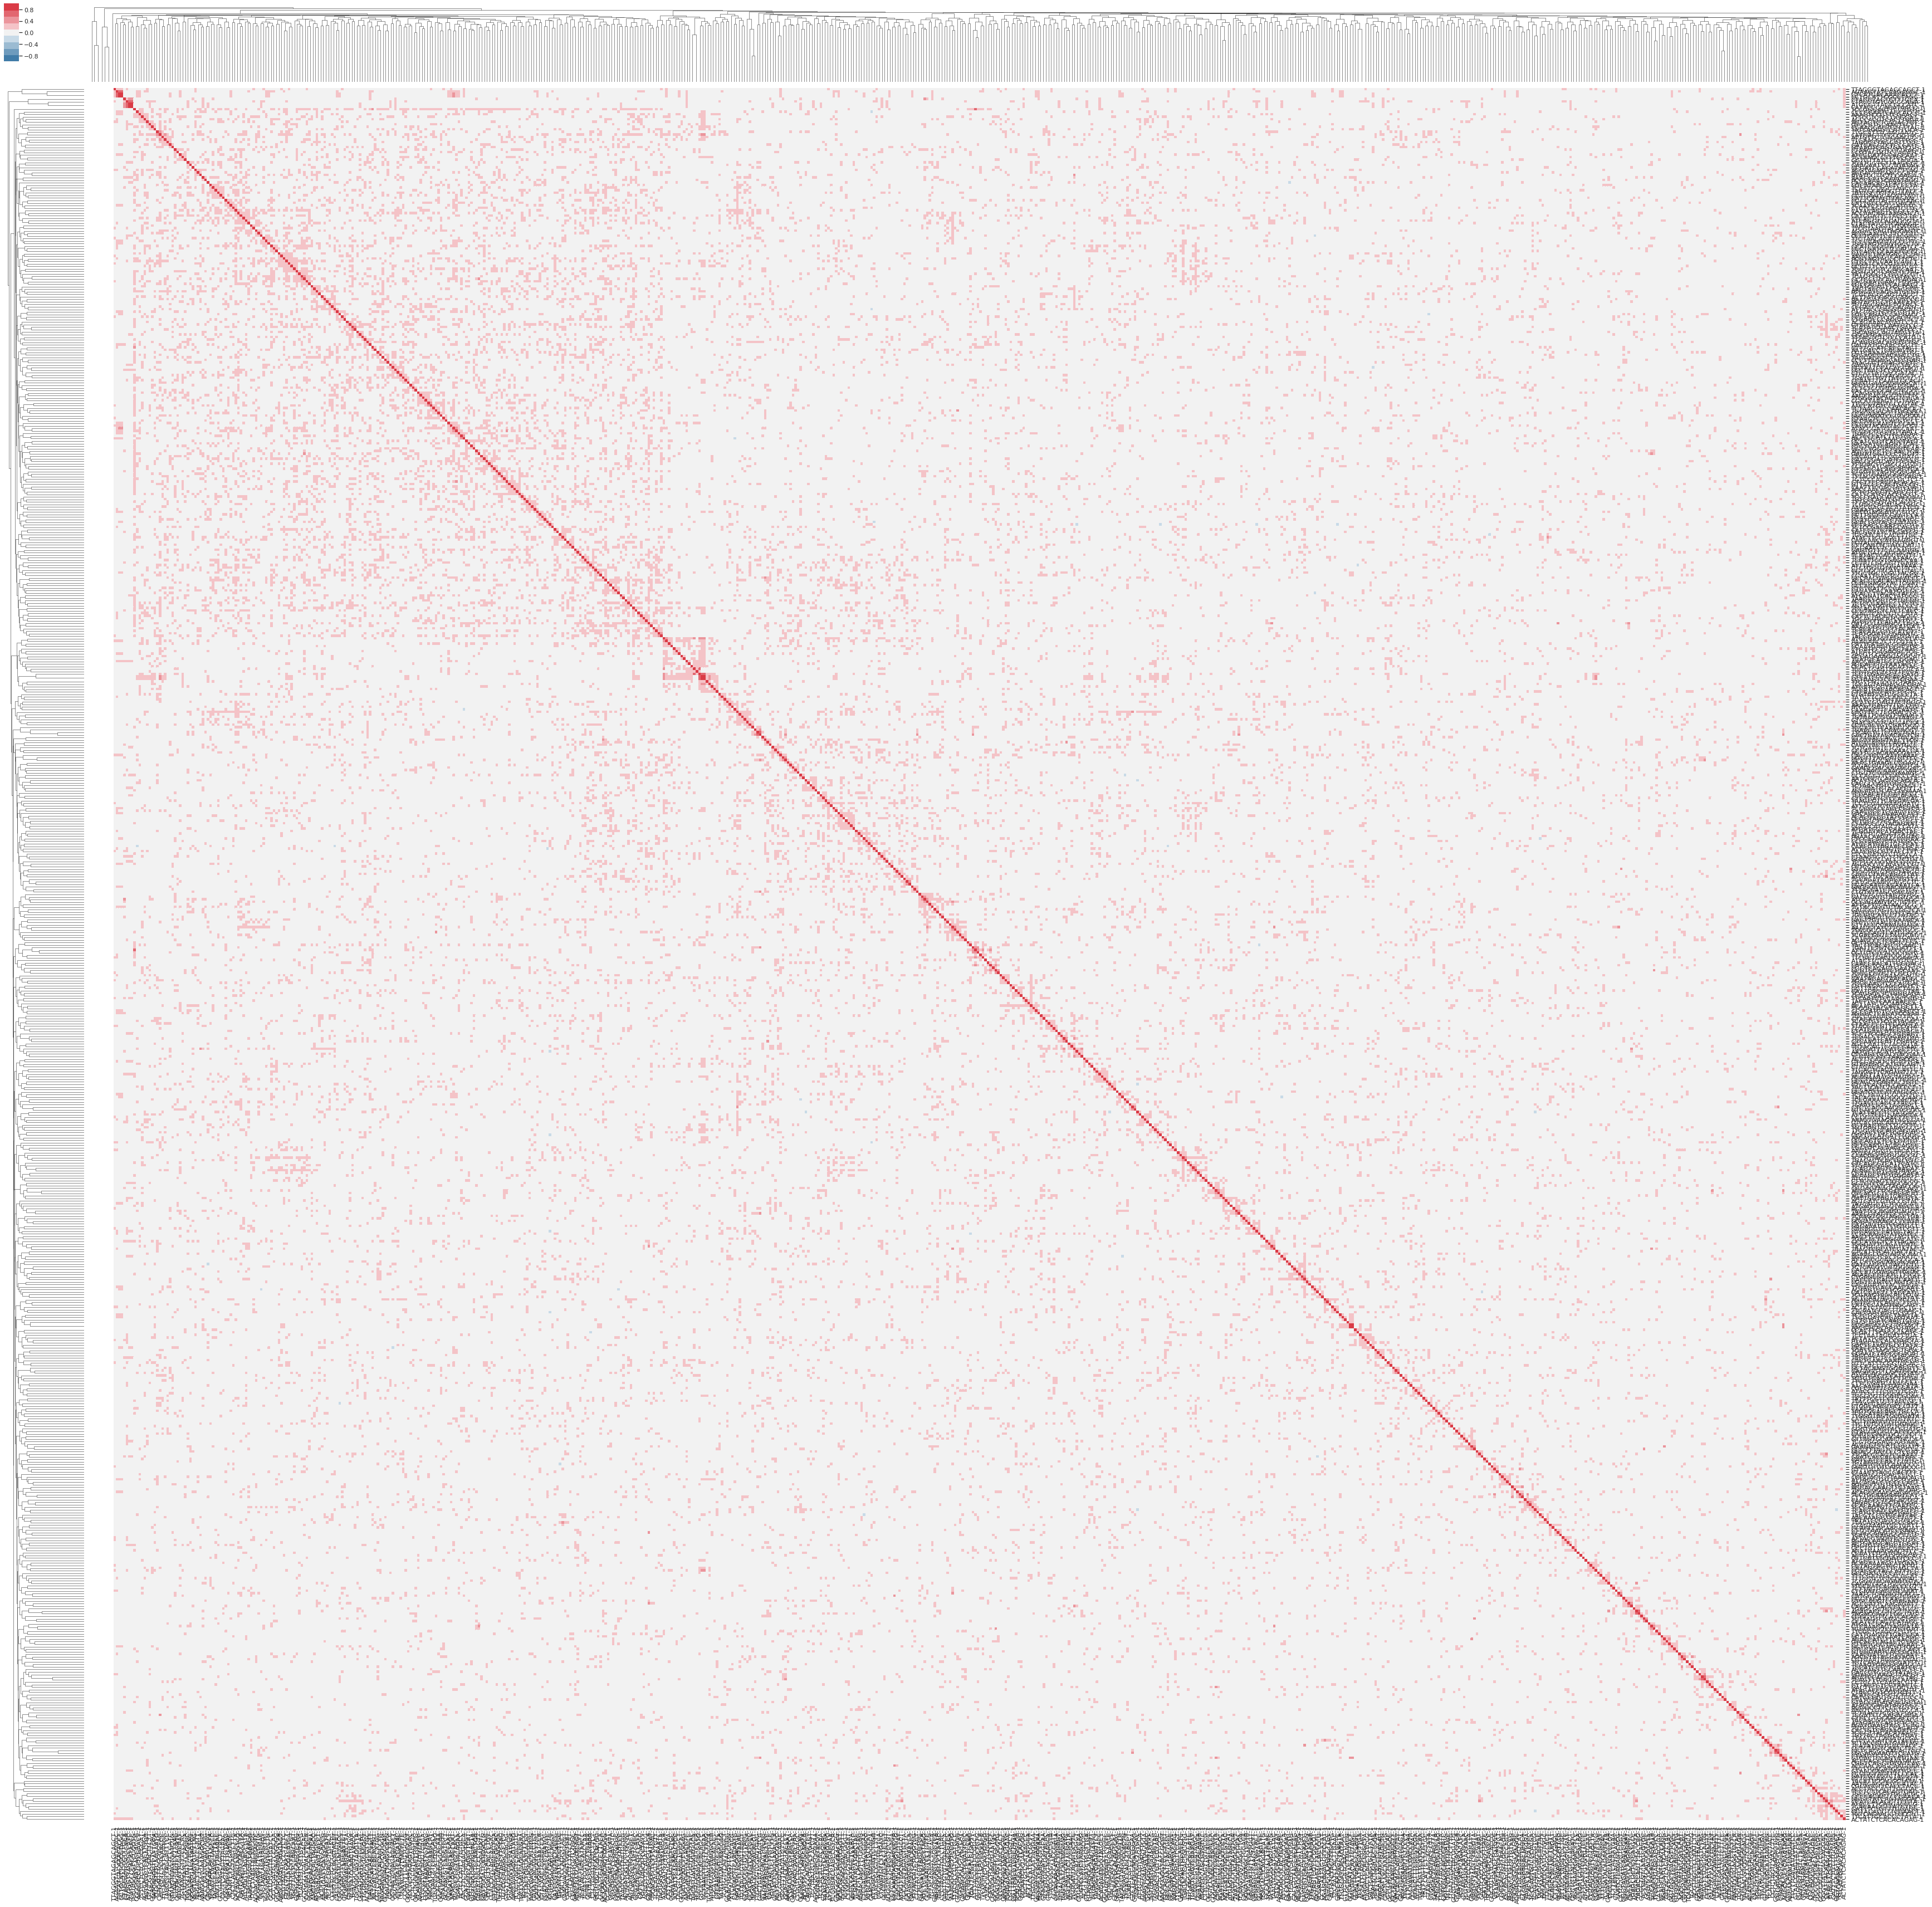

In [23]:
# plot corrplot

import seaborn as sn
import matplotlib.pyplot as plt

# now plot scatter matrix

def plot_scatter_mat(input_df):
    
    #print(input_df)
    sn.set(font_scale=1)
    corrMat = input_df.corr(method = 'spearman')
    
    ax = sn.clustermap(
    corrMat, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(240, 10, n=9),
    figsize = (60,60),
    square=True,
    xticklabels=True,
    yticklabels=True
    )
    
    plt.savefig("/labs/congle/PRT/a375_mem_chipseq/4_macs2/macs2_p0.001/plots/cell_clustering_spearman_20201208.pdf", bbox_inches = "tight")
    
corr_mat = plot_scatter_mat(non_zero)



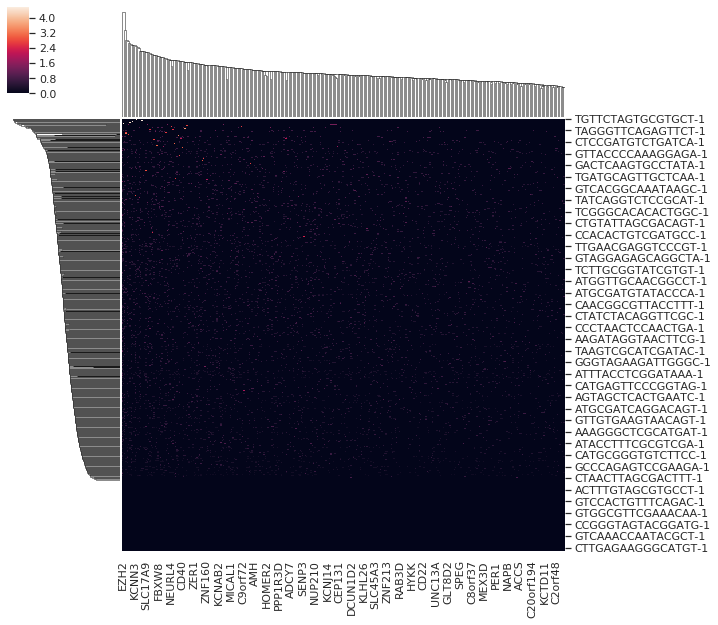

In [15]:
import seaborn as sns

sns.clustermap(smplbc_df)